In [ ]:
from openpile.construct import Pile, SoilProfile, Layer, Model
from openpile.soilmodels import API_clay, API_sand


p = Pile.create_tubular(
    name="<pile name>", top_elevation=0, bottom_elevation=-40, diameter=10, wt=0.050
)

# Create a 40m deep offshore Soil Profile with a 15m water column
sp = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_line=15,
    layers=[
        Layer(
            name="medium dense sand",
            top=0,
            bottom=-20,
            weight=18,
            lateral_model=API_sand(
                phi=33,
                kind="cyclic",
                extension="mt_curves",
            ),
        ),
        Layer(
            name="firm clay",
            top=-20,
            bottom=-40,
            weight=18,
            lateral_model=API_clay(Su=[50, 70], eps50=0.015, kind="cyclic", extension="mt_curves"),
        ),
    ],
)

# Create Model
M = Model(name="<model name>", pile=p, soil=sp)

# Apply bottom fixity along x-axis
M.set_support(elevation=-40, Tx=True)
# Apply axial and lateral loads
M.set_pointload(elevation=0, Mz=-600e3, Py=30e3)

# Run analysis
from openpile.analyze import simple_winkler_analysis

Result = simple_winkler_analysis(M)

# plot the results
Result.plot()


In [ ]:
Result.deflection


In [ ]:
layer = Layer(
    name="Soft Clay",
    top=-10,
    bottom=0,
    weight=19,
    lateral_model=API_clay(Su=[30, 35], eps50=[0.01, 0.02], Neq=100),
)


In [ ]:
from openpile.construct import SoilProfile, Layer
from openpile.soilmodels import API_sand, API_clay

# Create a 40m deep offshore Soil Profile with a 15m water column
sp = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_line=15,
    layers=[
        Layer(
            name="medium dense sand",
            top=0,
            bottom=-20,
            weight=18,
            lateral_model=API_sand(phi=33, kind="cyclic"),
        ),
        Layer(
            name="firm clay",
            top=-20,
            bottom=-40,
            weight=18,
            lateral_model=API_clay(Su=[50, 70], eps50=0.015, kind="cyclic"),
        ),
    ],
)

print(sp)


In [ ]:
from openpile.construct import Layer
from openpile.soilmodels import API_clay

# Create a layer
layer1 = Layer(
    name="Soft Clay",
    top=0,
    bottom=-10,
    weight=18,
    lateral_model=API_clay(Su=[30, 35], eps50=[0.01, 0.02], kind="static"),
)

print(layer1)


In [ ]:
import matplotlib.pyplot as plt
from openpile.utils.py_curves import api_sand

p, y = api_sand(
    sig=50,  # vertical stress in kPa
    X=5,  # depth in meter
    phi=35,  # internal angle of friction
    D=5,  # the pile diameter
    below_water_table=True,  # use initial subgrade modulus under water
    kind="static",  # static curve
)

plt.plot(y, p)
plt.ylabel("p [kN/m]")
plt.xlabel("y [m]")


In [ ]:
from openpile.construct import Pile, SoilProfile, Layer, Model
from openpile.soilmodels import Dunkirk_sand, Cowden_clay, API_clay

# Create a pile instance with two sections of respectively 10m and 30m length.
p = Pile.create(
    name="",
    kind="Circular",
    material="Steel",
    top_elevation=0,
    pile_sections={
        "length": [6, 6],
        "diameter": [2.0, 2.0],
        "wall thickness": [0.07, 0.08],
    },
)

# Create a 40m deep offshore Soil Profile with a 15m water column
sp = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_line=15,
    layers=[
        Layer(
            name="blabla 1",
            top=0,
            bottom=-10,
            weight=18,
            lateral_model=Cowden_clay(Su=150, G0=30e3),
        ),
        Layer(
            name="ohlalal",
            top=-10,
            bottom=-30,
            weight=18,
            lateral_model=Cowden_clay(Su=150, G0=30e3),
        ),
    ],
)

sp.plot()


In [ ]:
# import libraries
from openpile.construct import Pile, Model
from openpile.analyze import simple_beam_analysis

# create pile
pile = Pile(
    name="",
    kind="Circular",
    material="Steel",
    top_elevation=0,
    pile_sections={"length": [40], "diameter": [2], "wall thickness": [0.08]},
)

M = Model(name="", pile=pile)
M.set_support(elevation=0, Tx=True, Ty=True)
M.set_support(elevation=-40, Ty=True)
M.set_pointload(elevation=-20, Py=1000)

result = simple_beam_analysis(M)


In [ ]:
M.plot()


Text(0.5, 0, 'y [m]')

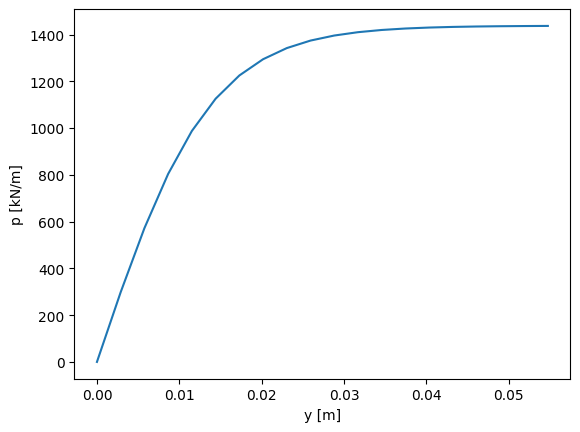

In [12]:
# import p-y curve for api_sand from openpile.utils
from openpile.utils.py_curves import api_sand

y, p = api_sand(
    sig=50,  # vertical stress in kPa
    X=5,  # depth in meter
    phi=35,  # internal angle of friction
    D=5,  # the pile diameter
    below_water_table=True,  # use initial subgrade modulus under water
    kind="cyclic",  # static curve
)

# create a plot of the results with Matplotlib
import matplotlib.pyplot as plt

plt.plot(y, p)
plt.ylabel("p [kN/m]")
plt.xlabel("y [m]")


Converged at iteration no. 4


,x_top [m],x_bottom [m],Top soil layer [m],Unit Weight [kN/m3],xg_top [m],xg_bottom [m],sigma_v top [kPa],sigma_v bottom [kPa]
0,0.0,-0.5,0.0,8.0,0.0,-0.5,0.0,4.0
1,-0.5,-1.0,0.0,8.0,-0.5,-1.0,4.0,8.0
2,-1.0,-1.5,0.0,8.0,-1.0,-1.5,8.0,12.0
3,-1.5,-2.0,0.0,8.0,-1.5,-2.0,12.0,16.0
4,-2.0,-2.5,0.0,8.0,-2.0,-2.5,16.0,20.0
...,...,...,...,...,...,...,...,...
75,-37.5,-38.0,0.0,8.0,-37.5,-38.0,300.0,304.0
76,-38.0,-38.5,0.0,8.0,-38.0,-38.5,304.0,308.0
77,-38.5,-39.0,0.0,8.0,-38.5,-39.0,308.0,312.0
78,-39.0,-39.5,0.0,8.0,-39.0,-39.5,312.0,316.0


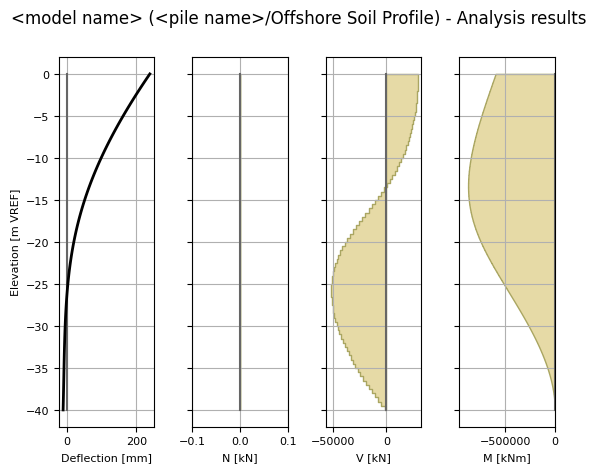

In [17]:
from openpile.construct import Pile, SoilProfile, Layer, Model
from openpile.soilmodels import API_clay, API_sand


p = Pile.create_tubular(
    name="<pile name>", top_elevation=0, bottom_elevation=-40, diameter=7, wt=0.050
)

# Create a 40m deep offshore Soil Profile with a 15m water column
sps = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_line=15,
    layers=[
        Layer(
            name="medium dense sand",
            top=0,
            bottom=-40,
            weight=18,
            lateral_model=API_sand(
                phi=33,
                kind="static",
                extension="mt_curves",
            ),
        ),
    ],
)

# Create a 40m deep offshore Soil Profile with a 15m water column
spc = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_line=15,
    layers=[
        Layer(
            name="medium dense sand",
            top=0,
            bottom=-50,
            weight=18,
            lateral_model=API_sand(
                phi=33, kind="cyclic", extension="mt_curves"
            ),
        ),
    ],
)

# Create Model
M = Model(name="<model name>", pile=p, soil=spc)

# Apply bottom fixity along x-axis
M.set_support(elevation=-40, Tx=True)
# Apply axial and lateral loads
M.set_pointload(elevation=0, Mz=-600e3, Py=30e3)

# Run analysis
from openpile.analyze import winkler

Result = winkler(M)

# plot the results
Result.plot()

M.soil_properties

In [ ]:
M.get_py_springs()


### Check if multipliers work

In [2]:
from openpile.construct import Layer
from openpile.soilmodels import API_sand
from openpile.utils.multipliers import durkhop

# Create a Layer with API_sand and monotonic curves with Durkhop approach
Layer(
    name="medium dense sand",
    top=0,
    bottom=-40,
    weight=18,
    lateral_model=API_sand(phi=33, kind="cyclic", p_multiplier=durkhop(D=7.0, ra=1.0)),
)


Layer(name='medium dense sand', top=0.0, bottom=-40.0, weight=18.0, lateral_model=API_sand(phi=33.0, kind='cyclic', G0=None, p_multiplier=<function durkhop.<locals>.<lambda> at 0x7f98b4aab950>, y_multiplier=1.0, extension=None), axial_model=None, color='#99A885')

In [1]:
from openpile.construct import Pile, SoilProfile, Layer, Model
from openpile.soilmodels import API_sand
from openpile.utils.multipliers import durkhop

p = Pile.create_tubular(
    name="<pile name>", top_elevation=0, bottom_elevation=-40, diameter=7, wt=0.050
)

# Create a 40m deep offshore Soil Profile with a 15m water column
sps = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_line=15,
    layers=[
        Layer(
            name="medium dense sand",
            top=0,
            bottom=-40,
            weight=18,
            lateral_model=API_sand(
                phi=33,
                kind="static",
                extension="mt_curves",
            ),
        ),
    ],
)

# Create a 40m deep offshore Soil Profile with a 15m water column
spc = SoilProfile(
    name="Offshore Soil Profile",
    top_elevation=0,
    water_line=15,
    layers=[
        Layer(
            name="medium dense sand",
            top=0,
            bottom=-40,
            weight=18,
            lateral_model=API_sand(
                phi=33, kind="cyclic", extension="mt_curves", p_multiplier=durkhop(D=7, ra=1.0)
            ),
        ),
    ],
)

# Create Model
M = Model(name="<model name>", pile=p, soil=sps)

# Apply bottom fixity along x-axis
M.set_support(elevation=-40, Tx=True)
# Apply axial and lateral loads
M.set_pointload(elevation=0, Mz=-600e3, Py=30e3)

# Run analysis
from openpile.analyze import winkler

Result = winkler(M)

# plot the results
Result.details()


Converged at iteration no. 2


{'converged @ iter no.': 1,
 'error [kN]': 16.251,
 'tolerance [kN]': 60.075,
 'Max. normal force [kN]': 0.0,
 'Min. normal force [kN]': 0.0,
 'Max. shear force [kN]': 29945.74,
 'Min. shear force [kN]': -42134.57,
 'Max. moment [kNm]': 64.9,
 'Min. moment [kNm]': -789953.33,
 'Max. settlement [m]': 0.0,
 'Min. settlement [m]': 0.0,
 'Max. deflection [m]': 0.159,
 'Min. deflection [m]': -0.006,
 'Max. rotation [rad]': 0.0,
 'Min. rotation [rad]': -0.013}

In [ ]:
{
    "converged @ iter no.": 1,
    "error [kN]": 16.251,
    "tolerance [kN]": 60.075,
    "Max. normal force [kN]": 0.0,
    "Min. normal force [kN]": 0.0,
    "Max. shear force [kN]": 29945.74,
    "Min. shear force [kN]": -42134.57,
    "Max. moment [kNm]": 64.9,
    "Min. moment [kNm]": -789953.33,
    "Max. settlement [m]": 0.0,
    "Min. settlement [m]": 0.0,
    "Max. deflection [m]": 0.159,
    "Min. deflection [m]": -0.006,
    "Max. rotation [rad]": 0.0,
    "Min. rotation [rad]": -0.013,
}
